# Simple SIR modeling 


In [14]:
import os
import pandas as pd
from scipy.integrate import odeint
import matplotlib.pyplot as plt

root = os.path.abspath(os.curdir)
plots_folder = os.path.join(root, 'plots') 

We'll need to use **differential equations** to calculate the population change over time. 

In [2]:
# The SIR model differential equations.
def deriv(state, t, N, beta, gamma):
    S, I, R = state
    # Change in S population over time
    dSdt = -beta * S * I / N
    # Change in I population over time
    dIdt = beta * S * I / N - gamma * I
    # Change in R population over time
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [21]:
def plot(S, I, R, _days, _transition_rate, _days_to_recover):

    suscpetible = S
    infected =I
    recovered = R
    days = _days
    
    fig = plt.figure(facecolor='w', figsize=(12, 7))
    ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
    ax.plot(days, suscpetible, 'b',
            alpha=0.5, linestyle = '--', lw=2, label='Susceptible')
    ax.plot(days, infected, 'r',
            alpha=0.5, linestyle = '--', lw=2, label='Infected')
    ax.plot(days, recovered, 'g',
            alpha=0.5, linestyle = '--', lw=2, label='Recovered with immunity')

    ax.set_xlabel('Days')
    ax.set_ylabel('Number of Students')
    plt.title(f"Population distribution with transition rate "
              f"= {_transition_rate} & recovery time of {_days_to_recover} days")

    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)

    ax.grid(b=False, which='both', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    plt.savefig(plots_folder + "SIR_model.svg")
    plt.show()

**Transition rate** is `transmission rate * contact rate`, so:

* 2% transmission rate and 20 contacts a day is `0.02 * 20 = 0.4`

**Recovery rate** is `1 / days`, so 

* 3 day recovery rate is `1 / 3 = 0.33`

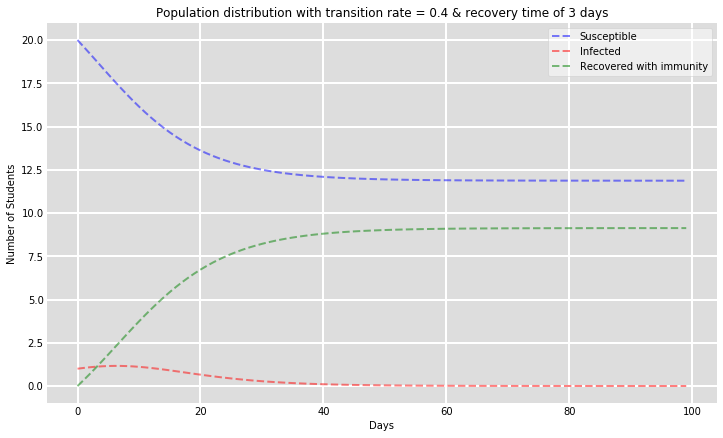

In [22]:
# Everyone not infected/recovered is susceptible
_population = 21
_recovered = 0
_infected = 1
_susceptible = _population - _infected - _recovered
_days_to_recover = 3
_infection_rate = 0.02

_transition_rate = _susceptible * _infection_rate
_recovery_rate = 1/_days_to_recover

#Range of days
_days = range(0, 100)

# Solving differential equations with initial conditions as specified above 
_diff = odeint(deriv,
             [_susceptible, _infected, _recovered],
             _days,
             args=(_population, _transition_rate, _recovery_rate))

S, I, R = _diff.T

#Creating a dataframe for the population 
_pop_df = pd.DataFrame({
    'suseptible': S,
    'infected': I,
    'recovered': R,
    'day': _days
})

plot(S, I, R, _days, _transition_rate, _days_to_recover)
